***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [129]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [130]:
dados.head(15)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [131]:
dados.Renda.min()

0

In [132]:
dados.Renda.max()

200000

In [133]:
intervalo_classes = [0, 2 * 788, 5 * 788, 15 * 788, 25 * 788, 200000]

### 2º Definir os labels das classes

In [134]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [135]:
freq_renda_classes = pd.cut(x = dados.Renda, bins = intervalo_classes, labels = labels, include_lowest = True)
frequencia = freq_renda_classes.value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [136]:
percentual = (freq_renda_classes.value_counts(normalize = True) * 100).round(2)
percentual

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [137]:
dist_dados_renda = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})
dist_dados_renda

,Frequência,Percentual (%)
E,49755,64.75
D,18602,24.21
C,7241,9.42
B,822,1.07
A,420,0.55


In [138]:
dist_dados_renda.sort_index(ascending = False, inplace = True)
dist_dados_renda.rename_axis('Classes', axis = 1, inplace = True)
dist_dados_renda

Classes,Frequência,Percentual (%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

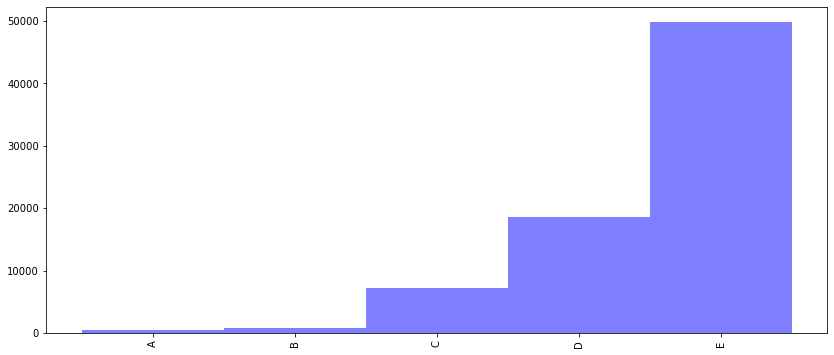

In [139]:
dist_dados_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.5, figsize=(14, 6))

In [140]:
dados.shape[0]

76840

In [141]:
salario_minimo_ou_abaixo = (dados.query('Renda == 788')['Renda']) & (dados.query('Renda < 788')['Renda'])
salario_minimo_ou_abaixo = salario_minimo_ou_abaixo.value_counts().sum()
salario_minimo_ou_abaixo

22182

In [142]:
freq_classe_E = dist_dados_renda.loc['E'].Frequência
freq_classe_E

49755.0

In [143]:
((freq_classe_E - salario_minimo_ou_abaixo) / freq_classe_E) * 100

55.41754597527887

> ### Conclusões

Observando o gráfico de distribuição de frequências é possível perceber que a classe E tem a maior frequência e, dentro dessa classe, é interressante observar que mais de 50% recebem um ou menos de um salário mínimo. Em seguida, vem as classes D e C com um frequência considerável.


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [144]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


C:\Users\felip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição frequência idade'}, xlabel='Idade', ylabel='Density'>

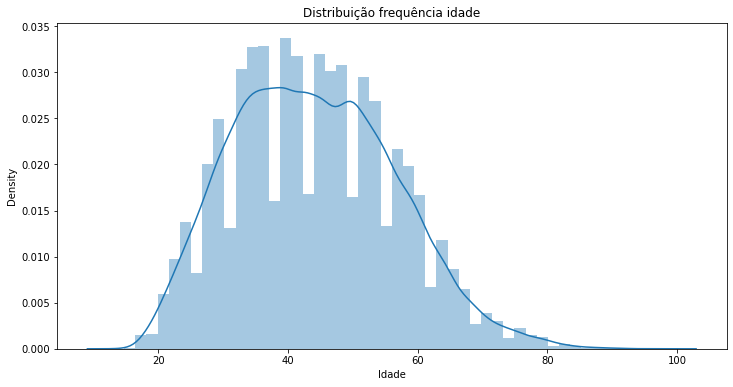

In [145]:
ax = sns.distplot(dados.Idade, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição frequência idade')
ax.set_xlabel('Idade')
ax

> ### Conclusões

O gráfico da altura é assimétrico à direita, indicando que a moda é maior que a mediana e a média. Apesar de ter um comportamento de grandes vales em alguns intervalos, ele se comporta como assimétrico á direita devido a sua linha de densidade demonstrar essa aparencia. E é natural que o gráfico seja assim, já que a maior parte das pessoas que são donas de seus domicílios possuem mais de 18 anos, chegando a pico nas proximidades da idade de 40 anos.

C:\Users\felip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição frequência renda'}, xlabel='Renda', ylabel='Density'>

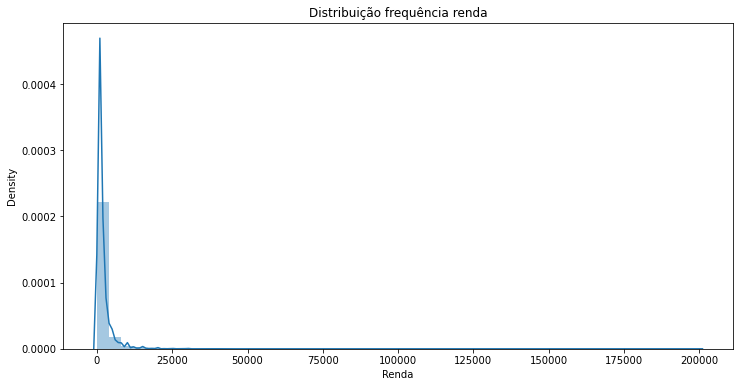

In [146]:
ax = sns.distplot(dados.Renda, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição frequência renda')
ax.set_xlabel('Renda')
ax

> ### Conclusões

Aqui temos outro gráfico que é assimétrico à direita. Isso acontece por causa dos valores altíssimos que poucas pessoas ganham. Se retirarmos esses valores, o gráfico fica um pouco mais legível.

C:\Users\felip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição frequência renda menor que 25000'}, xlabel='Renda', ylabel='Density'>

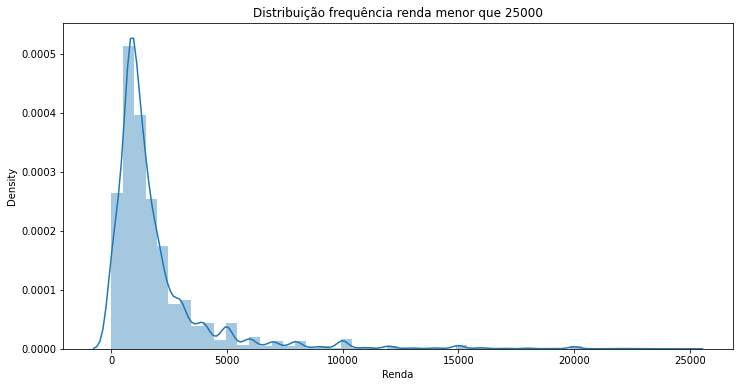

In [147]:
ax = sns.distplot(dados.query('Renda < 25000').Renda, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição frequência renda menor que 25000')
ax.set_xlabel('Renda')
ax

C:\Users\felip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição frequência Altura'}, xlabel='Altura', ylabel='Density'>

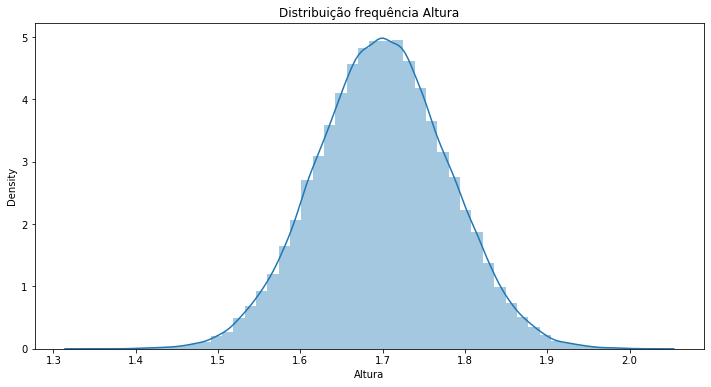

In [148]:
ax = sns.distplot(dados.Altura, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição frequência Altura')
ax.set_xlabel('Altura')
ax

> ### Conclusões

O gráfico da frequência de altura possui um comportamento bem diferente dos apresentados anteriormente. Ele é simétrico. Isso significa que média, moda e mediana são iguais.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\felip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição frequência renda menor que 25000'}, xlabel='Renda', ylabel='Density'>

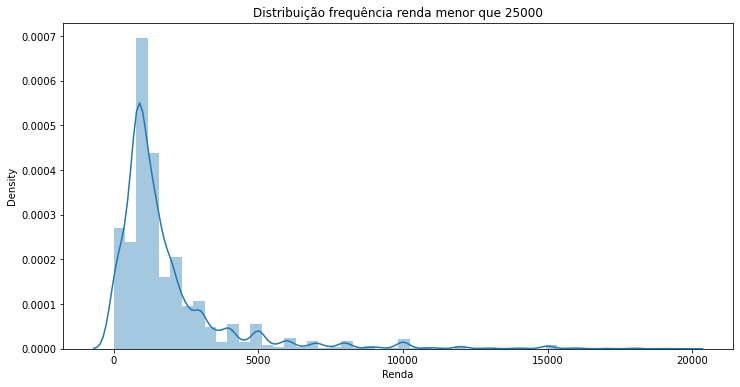

In [149]:
ax = sns.distplot(dados.query('Renda < 20000').Renda, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição frequência renda menor que 25000')
ax.set_xlabel('Renda')
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [150]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [151]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [152]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

É visível que a frequência de homens que são proprietários dos imóveis é maior que a das mulheres e que essa situação ocorre em todas as variáveis.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [153]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [154]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [155]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto
O desvio absoluto médio de um conjunto de dados é a média das distâncias entre cada dado e a média. Ele nos dá uma noção da variabilidade em um conjunto de dados.

In [156]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância
A variância é uma medida de dispersão que indica o quanto os valores de um conjunto de dados estão próximos ou distantes da média dos dados.

<font color = 'blue'>fonte: https://escolaeducacao.com.br/variancia/</font>

In [157]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão
O desvio padrão é uma medida que expressa o grau de dispersão de um conjunto de dados. Ou seja, o desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.

<font color = 'blue'>fonte: https://www.todamateria.com.br/desvio-padrao/</font>

In [158]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [159]:
renda_por_sexo_e_cor = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mean', 'median', 'max'}, values = dados.Renda)
renda_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_por_sexo_e_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

 Praticamente em todas as situações o salário do homem é maior que o da mulher, independente da cor de sua pele. Na maioria das vezes essa situação acontece porque mulheres costumam ocupar cargos menores e/ou trabalham em casa cuidando dos afazeres domésticos,acarretando em medidas menores. E essa situação vai além da "esfera econômica", muitos outros assuntos estão envolvidos como, por exemplo, o machismo e o preconceito.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [160]:
renda_por_sexo_e_cor_disp = pd.crosstab(dados.Cor, dados.Sexo, aggfunc = {'mad', 'var', 'std'}, values = dados.Renda)
renda_por_sexo_e_cor_disp.rename(index = cor, inplace = True)
renda_por_sexo_e_cor_disp.rename(columns = sexo, inplace = True)
renda_por_sexo_e_cor_disp

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Pensando no cado do Desvio Médio Absoluto (mad): 

In [161]:
df_mean = renda_por_sexo_e_cor['mean']
df_mad = renda_por_sexo_e_cor_disp['mad']
df_mean_mad = df_mean.merge(df_mad, how = "outer", on = 'Cor')

mean_mad = {'Masculino_x' : 'Masculino_mean', 'Masculino_y' : 'Masculino_mad', 
            'Feminino_x' : 'Feminino_mean', 'Feminino_y' : 'Feminino_mad'}

df_mean_mad.rename(columns = mean_mad, inplace = True)
df_mean_mad

Sexo,Masculino_mean,Feminino_mean,Masculino_mad,Feminino_mad
Cor,,,,
Indígena,1081.710938,2464.386139,798.910889,3007.892952
Branca,2925.744435,2109.866750,2261.012346,1670.967106
Preta,1603.861687,1134.596400,975.602482,705.453357
Amarela,4758.251064,3027.341880,3709.597211,2549.146322
Parda,1659.577425,1176.758516,1125.827704,811.580946


Vendo lado a lado a média e o desvio médio absoluto, nota-se que os salários estão muito variados. Há uma grande disperção e isso pode indicar que há uma diferença do ganho salárial considerável dentro do mesmo gênero de cada cor.

Pensando no caso do Desvio Padrão (std):
 
O desvio padrão é elevado também, indicado que os conjunto de dados não é muito homogêneo.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda por sexo e cor'}, xlabel='R$', ylabel='Cor'>

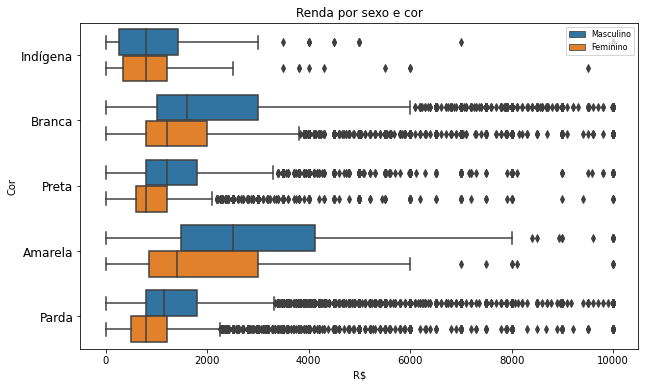

In [163]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', data = dados.query('Renda <= 10000'), hue = 'Sexo', orient = 'h')
ax.figure.set_size_inches(10, 6)
ax.set_title('Renda por sexo e cor')
ax.set_xlabel('R$')
ax.set_ylabel('Cor')
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=8)

ax

> ### Conclusões

Um comportamento muito interessante que aconetce é que a mediana do salário do sexo feminino é equivalente ao primeiro quartil do sexo masculino em duas situações: na cor da pele Preta e da Parda. Na cor Amarela, a mediana do sexo feminino chega a ser menor que o primeiro quartil do sexo masculino (Detalhe: As pessoas de cor Amarela possui uma renda maior que as demais). Na cor Branca, a mediana do sexo feminino é um pouco maior que o primeiro quartil do sexo masculino, mas está um pouco mais distante da mediana. Por fim, Indígena possui a mesma mediana para ambos os sexos, mas o valor da dispersão ocupa um valor menor. 

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [164]:
from scipy import stats

perc_sal_min_ou_abaixo = stats.percentileofscore(a = dados.Renda, score = 788, kind = 'weak')
print(f"{perc_sal_min_ou_abaixo:.2f}%")

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [165]:
valor_max_99 = dados.Renda.quantile(.99)
print(f"R${valor_max_99:.2f}")

R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [166]:
estatistica_renda_sexo_ade = pd.crosstab(dados['Anos de Estudo'], dados.Sexo,
                                         aggfunc={'mean', 'median', 'max', 'std'},
                                         values = dados.Renda).round(2)
estatistica_renda_sexo_ade.rename(index = anos_de_estudo, inplace = True)
estatistica_renda_sexo_ade.rename(columns = sexo, inplace = True)
estatistica_renda_sexo_ade

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

Exceto em um caso (12 anos de estudo), todos os máximos do sexo masculino é maior independente da quantidade de anos de estudo, entretanto, nesse único caso, a média e a mediana possuem um valor alto e o desvio padrão é mais baixo do que p desvio do sexo feminino, indicando que o salário dos homens com 12 anos de estudos são menos dispersos.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

#### Idade de 35 anos

<AxesSubplot:title={'center':'Renda segundo Anos de estudo e Sexo'}, xlabel='Anos de estudo', ylabel='Sexo'>

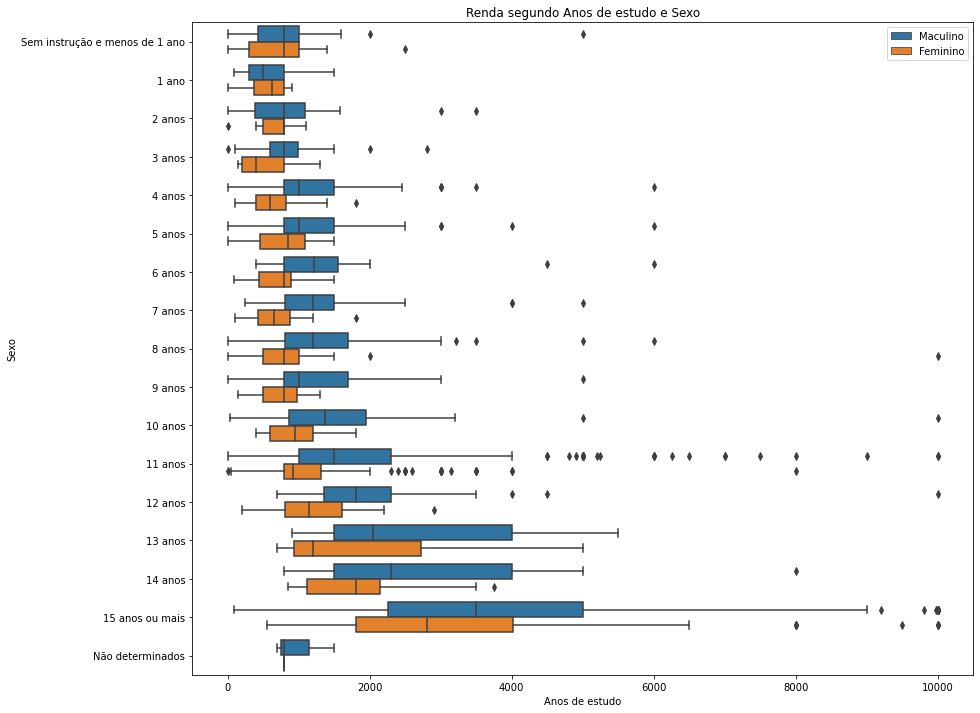

In [176]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', 
                 data = dados.query('Renda <= 10000 and Idade == 35'), 
                 hue = 'Sexo', orient = 'h')
ax.figure.set_size_inches(14, 12)
ax.set_title('Renda segundo Anos de estudo e Sexo')
ax.set_xlabel('Anos de estudo')
ax.set_ylabel('Sexo')
ax.set_yticklabels([anos for anos in anos_de_estudo.values()])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Maculino', 'Feminino'])
ax

Aqui vemos uma coisa interessante. Ambos os sexos sem instrução ou com menos de um ano de estudo e com um ano de estudo possuem o terceiro quartil iguais. Mas quando aumentamos um pouco a idade para 40 anos, a situação muda.

#### Idade de 40 anos

<AxesSubplot:title={'center':'Renda segundo Anos de estudo e Sexo'}, xlabel='Anos de estudo', ylabel='Sexo'>

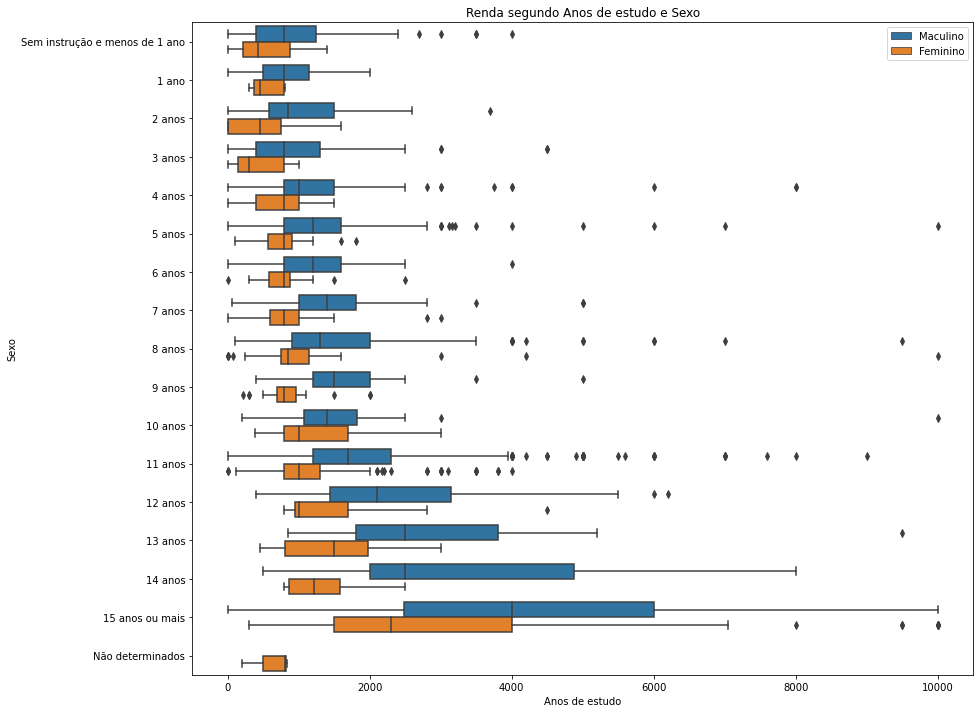

In [177]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', 
                 data = dados.query('Renda <= 10000 and Idade == 40'), 
                 hue = 'Sexo', orient = 'h')
ax.figure.set_size_inches(14, 12)
ax.set_title('Renda segundo Anos de estudo e Sexo')
ax.set_xlabel('Anos de estudo')
ax.set_ylabel('Sexo')
ax.set_yticklabels([anos for anos in anos_de_estudo.values()])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Maculino', 'Feminino'])
ax

Quando aumentamos a idade para 40 anos, todos os terceiros quartis e medianas do sexo masculino são maiores. E apenas o máximo do sexo masculino conseguiu alcançar o salário de R$10.000.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [169]:
renda_por_estado = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_por_estado.rename(index = uf, inplace = True)
renda_por_estado

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

#### Separando por região e analisar a soma das médias dos estados:

In [170]:
regiao_sul = renda_por_estado.loc[['Rio Grande do Sul', 'Santa Catarina', 'Paraná']]
regiao_sul.Renda['mean'].sum()

7279.884034008963

In [171]:
regiao_sudeste = renda_por_estado.loc[['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo']]
regiao_sudeste.Renda['mean'].sum()

9217.324089764577

In [172]:
regiao_centro_oeste = renda_por_estado.loc[['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']]
regiao_centro_oeste.Renda['mean'].sum()

10629.792460496657

In [173]:
regiao_norte = renda_por_estado.loc[['Acre', 'Amazonas', 'Roraima', 'Pará', 'Rondônia', 'Tocantins', 'Amapá']]
regiao_norte.Renda['mean'].sum()

11556.097327296031

In [174]:
regiao_nordeste = renda_por_estado.loc[['Maranhão', 'Piauí', 'Ceará', 'Bahia', 'Pernambuco', 'Paraíba',
                                       'Rio Grande do Norte', 'Alagoas', 'Sergipe']]
regiao_nordeste.Renda['mean'].sum()

11197.86657811887

A região que possui a maior soma das médias é a Região Norte, mas levando em conta o número de estados que a compõe, a soma fica em desvantagem quando comparada a Região Centro Oeste que, com menos estados, conseguiu uma soma bem próxima devido ao fato do Destrito Federal ter a maior média dos demais estados. A Região Nordeste é a segunda que possui a maior soma, mas, quando comparado o número de estado com as demais regiões, acaba saindo em desvantagem.

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Renda por UF'}, xlabel='Renda', ylabel='UF'>

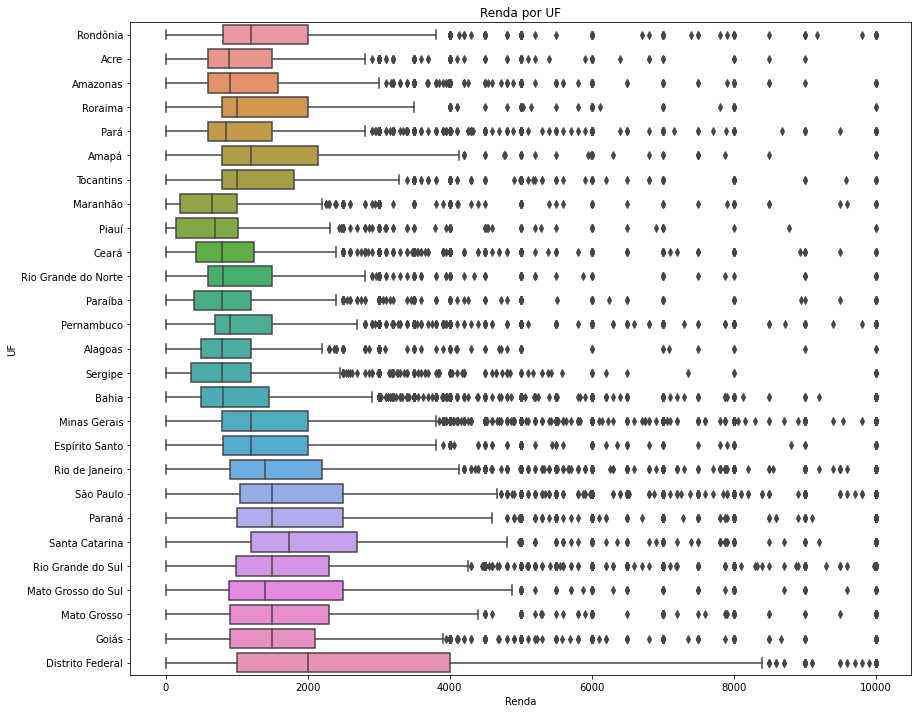

In [178]:
ax = sns.boxplot(x = 'Renda', y = 'UF', 
                 data = dados.query('Renda <= 10000'), 
                 orient = 'h')
ax.figure.set_size_inches(14, 12)
ax.set_title('Renda por UF')
ax.set_xlabel('Renda')
ax.set_ylabel('UF')
ax.set_yticklabels([uf for uf in uf.values()])

ax

> ### Conclusões

Com exceção do Distrito Federal, se separarmos cada boxplot por região, é possível perceber que terão uma aparência um pouco uniforme, nenhuma região tem um estado que se distoa agressivamente dos outros. A mediana, o primeiro e o terceiro quertil tem diferença, o intervalo interquartil também, mas cada região possui um distribuição de renda parecida.